In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
import csv
import pandas as pd

In [ ]:
directory = os.path.join(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\NAK\WS24-25_Group3\WS24-25_Group3\Silver")
file_list = os.listdir(directory)

In [15]:
file_list[0]

'Ag_1.5m.csv'

In [11]:
comma_decimal_to_float = lambda valstr: float(valstr.decode("utf-8").replace(',','.'))

In [13]:
file = np.genfromtxt(os.path.join(directory, file_list[0]), delimiter=';',converters= { 0: comma_decimal_to_float, 1: comma_decimal_to_float })

In [19]:
for i in range(1, len(file)):
    file[i][0] = file[i][0] +25
    

In [35]:
df = pd.DataFrame(file[1:],dtype=float)

In [39]:
df['f0'].values

array([ 30.   ,  35.2  ,  40.401,  45.6  ,  50.801,  56.   ,  61.2  ,
        66.401,  71.6  ,  76.799,  82.001,  87.2  ,  92.4  ,  97.601,
       102.801, 108.001, 113.2  , 118.4  , 123.6  , 128.801, 134.   ,
       139.2  , 144.4  , 149.6  , 154.799, 159.999, 165.199, 170.4  ,
       175.599, 180.8  , 186.   , 191.2  , 196.4  , 201.6  , 206.799,
       212.   , 217.2  , 222.4  , 227.6  , 232.8  , 238.   , 243.2  ,
       248.4  , 253.6  , 258.8  , 264.   , 269.101, 274.3  , 279.5  ,
       284.6  , 289.799, 294.9  , 300.101, 305.301, 310.5  , 315.7  ,
       320.9  , 326.1  , 331.3  , 336.499, 341.699, 346.901, 352.101,
       357.3  , 362.5  , 367.7  , 372.9  , 378.099, 383.3  , 388.501,
       393.7  , 398.9  , 404.1  , 409.3  , 414.499, 419.7  , 424.901])

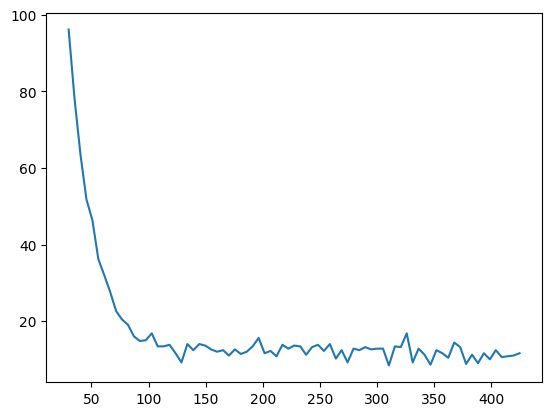

In [ ]:
plt.plot(df['f0'].values,df['f1'].values,)

In [42]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [45]:
p1,p2=sp.optimize.curve_fit(func, df['f0'].values, df['f1'].values,p0=[100, 0.01,0])

In [49]:
p1

array([3.49778001e+02, 4.73321693e-02, 1.19568795e+01])

In [50]:
np.log(2)/p1[1]

14.64431466158661

Text(0.5, 1.0, 'Decay Curve')

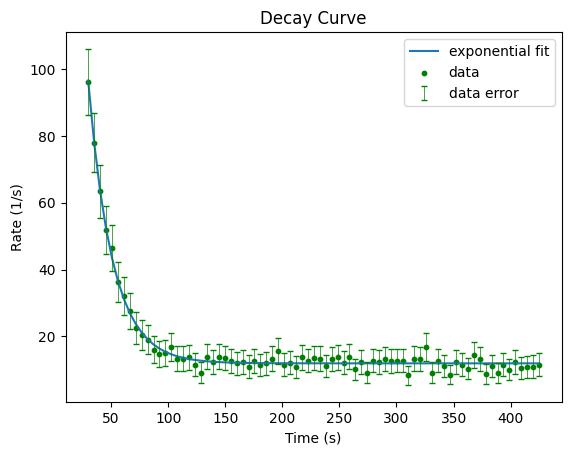

In [73]:
plt.plot(df['f0'].values,func(df['f0'].values,p1[0],p1[1],p1[2]) )
plt.scatter(df['f0'].values,df['f1'].values,color='green',s=10)
plt.xlabel('Time (s)')
plt.errorbar(df['f0'].values,df['f1'].values, yerr=np.sqrt(df['f1'].values),fmt='none', ecolor='green',elinewidth=0.5,capsize=2) 
plt.legend(['exponential fit','data','data error'])
plt.ylabel('Rate (1/s)')
plt.title('Decay Curve')


In [344]:
file_list
fl_dot=[]
for fi in file_list:
    fl_dot.append(fi[:-4]+"_dot.csv")
fl_dot

['Ag_1.5m_dot.csv',
 'Ag_10s_dot.csv',
 'Ag_15m_dot.csv',
 'Ag_1m_dot.csv',
 'Ag_20s_dot.csv',
 'Ag_2m_dot.csv',
 'Ag_30s_dot.csv',
 'Ag_45s_dot.csv',
 'Ag_5m_dot.csv',
 'Ag_5s_dot.csv']

In [345]:
tr_time = [18,26,26,15,18,26,25,15,29,25]
ac_time = ["1.5m",'10m','15m','1m','20s','2m','30s','45s','5m','5s']
init_guess = [
    [100,0.01,0],
    [50,0.02,0],
    [110,0.005,0],
    [100,0.01,0],
    [60,0.02,0],
    [70,0.02,0],
    [60,0.02,0],
    [100,0.01,0],
    [70,0.01,0],
    [30,0.01,0]
]
max_ind_target=[
    250,250,250,250,200,250,200,250,200,200
]

In [346]:
lambda_arr=[]
hl_arr=[]
A_0_arr=[]
for (i,file_path) in zip(range(len(fl_dot)),fl_dot):
    file = np.genfromtxt(os.path.join(directory, file_path), delimiter=';')
    print(file_path)
    for j in range(1, len(file)):
        file[j][0] = file[j][0] + tr_time[i]
    df = pd.DataFrame(file[1:],dtype=float,columns=['f0','f1'])
    def func(x, a, b, c):
        return a * np.exp(-b * x) 
    max_ind = np.abs(df['f0'].values-max_ind_target[i]).argmin()
    print(max_ind)
    # p1,p2=sp.optimize.curve_fit(func, df['f0'].values, df['f1'].values,p0=init_guess[i],maxfev=100000)
    p1,p2=sp.optimize.curve_fit(func, df['f0'].values[:max_ind], df['f1'].values[:max_ind],p0=init_guess[i],maxfev=100000,)
    
    lambda_arr.append(p1[1])
    hl_arr.append(np.log(2)/p1[1])
    A_0_arr.append(p1[0])
    plt.plot(df['f0'].values,func(df['f0'].values,p1[0],p1[1],p1[2]) )
    plt.scatter(df['f0'].values,df['f1'].values,color='green',s=10)
    plt.xlabel('Time (s)')
    plt.errorbar(df['f0'].values,df['f1'].values, yerr=np.sqrt(df['f1'].values),fmt='none', ecolor='green',elinewidth=0.5,capsize=2) 
    plt.legend(['exponential fit with lambda = '+str(p1[1]),'data','data error'])
    plt.ylabel('Rate (1/s)')
    plt.title('Decay Curve for Silver with activation time = '+(ac_time[i]))
    # plt.savefig(os.path.join(directory, 'Decay_Curve_Silver_Activation_Time_'+ac_time[i]+'.png'))
    plt.close()

Ag_1.5m_dot.csv
44
Ag_10s_dot.csv
42
Ag_15m_dot.csv
42
Ag_1m_dot.csv
44
Ag_20s_dot.csv
34
Ag_2m_dot.csv
42
Ag_30s_dot.csv
33
Ag_45s_dot.csv
44
Ag_5m_dot.csv
32
Ag_5s_dot.csv
33


C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\praty\AppData\Local\Packages\PythonSoftwareFounda

Text(0.5, 1.0, 'Half Life vs Activation time for Silver')

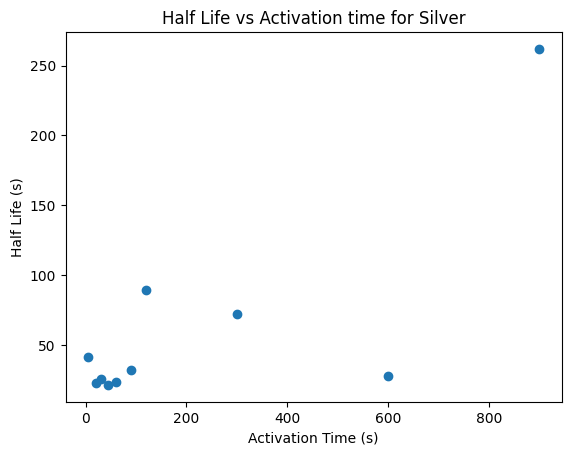

In [364]:
ac_time_num = [90,10*60,15*60,60,20,2*60,30,45,5*60,5]
plt.scatter(ac_time_num,hl_arr)
plt.xlabel("Activation Time (s)")
plt.ylabel("Half Life (s)")

plt.title("Half Life vs Activation time for Silver")

# def pol(x,a,b,c,d):
#     return a*x**3+b*x**2+c*x+d

# p1,p2=sp.optimize.curve_fit(pol,np.array(ac_time_num), np.array(hl_arr),p0=[1,1,1,1],maxfev=100000,)

# plt.plot(ac_time_num,pol(np.array(ac_time_num),p1[0],p1[1],p1[2],p1[3]))


In [348]:
Act_arr=[]
for i in range(len(A_0_arr)):
    Act_arr.append(A_0_arr[i]*lambda_arr[i])

In [242]:
lambda_arr

[0.016484173069943663,
 0.02410601518202795,
 0.0011128149532550417,
 0.028845532671009044,
 0.029614704600967053,
 0.00285239431271324,
 0.024891677372740218,
 0.03235894877812364,
 0.002839425423509783,
 0.010819207204792005]

Text(0.5, 1.0, 'Initial Activity as a function of activation time')

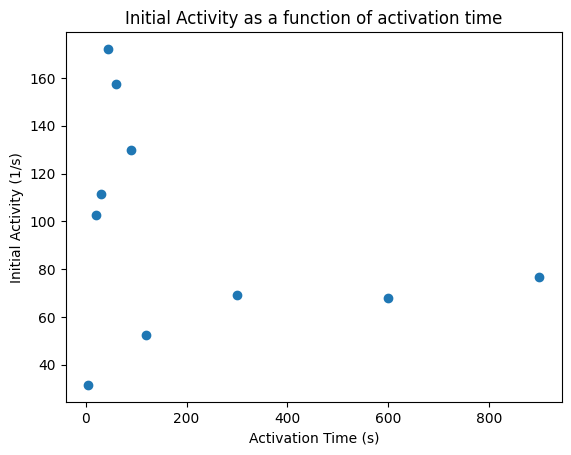

In [366]:
plt.scatter(ac_time_num,(A_0_arr))
plt.xlabel("Activation Time (s)")
plt.ylabel("Initial Activity (1/s)")
plt.title("Initial Activity as a function of activation time")

In [290]:
fileind = np.genfromtxt(r"C:\Users\praty\OneDrive - UT Cloud\Astro Lab\NAK\WS24-25_Group3\WS24-25_Group3\Indium_dot.csv",delimiter=';')


In [291]:
fileind

array([[           nan,            nan],
       [8.33166667e-02, 2.28000000e+02],
       [1.70000000e-01, 2.19000000e+02],
       [2.56666667e-01, 2.13400000e+02],
       [3.43333333e-01, 1.97200000e+02],
       [4.29983333e-01, 1.98800000e+02],
       [5.16683333e-01, 1.96000000e+02],
       [6.03333333e-01, 1.98400000e+02],
       [6.90000000e-01, 1.90000000e+02],
       [7.76683333e-01, 1.86600000e+02],
       [8.63333333e-01, 1.95800000e+02],
       [9.50000000e-01, 1.89200000e+02],
       [1.03666667e+00, 1.88200000e+02],
       [1.12333333e+00, 1.91800000e+02],
       [1.21000000e+00, 1.87800000e+02],
       [1.29668333e+00, 1.92200000e+02],
       [1.38333333e+00, 1.88200000e+02],
       [1.47000000e+00, 1.93200000e+02],
       [1.55666667e+00, 1.85000000e+02],
       [1.64333333e+00, 1.95800000e+02],
       [1.73000000e+00, 1.97200000e+02],
       [1.81666667e+00, 1.86000000e+02],
       [1.90331667e+00, 1.84600000e+02],
       [1.99001667e+00, 1.88600000e+02],
       [2.076666

In [292]:
for i in range(1, len(fileind)):
    fileind[i][0] = fileind[i][0] + 18/60
    

In [336]:
fileind

array([[         nan,          nan],
       [  0.38331667, 228.        ],
       [  0.47      , 219.        ],
       [  0.55666667, 213.4       ],
       [  0.64333333, 197.2       ],
       [  0.72998333, 198.8       ],
       [  0.81668333, 196.        ],
       [  0.90333333, 198.4       ],
       [  0.99      , 190.        ],
       [  1.07668333, 186.6       ],
       [  1.16333333, 195.8       ],
       [  1.25      , 189.2       ],
       [  1.33666667, 188.2       ],
       [  1.42333333, 191.8       ],
       [  1.51      , 187.8       ],
       [  1.59668333, 192.2       ],
       [  1.68333333, 188.2       ],
       [  1.77      , 193.2       ],
       [  1.85666667, 185.        ],
       [  1.94333333, 195.8       ],
       [  2.03      , 197.2       ],
       [  2.11666667, 186.        ],
       [  2.20331667, 184.6       ],
       [  2.29001667, 188.6       ],
       [  2.37666667, 192.8       ],
       [  2.46333333, 187.        ],
       [  2.55      , 180.2       ],
 

In [337]:
df = pd.DataFrame(fileind[1:],dtype=float,columns=['f0','f1'])


In [295]:
df

,f0,f1
0,0.383317,228.0
1,0.470000,219.0
2,0.556667,213.4
3,0.643333,197.2
4,0.729983,198.8
...,...,...
341,29.918333,133.2
342,30.005000,129.6
343,30.091683,133.4
344,30.178333,124.2


In [339]:
def func(x, a1, b1, a2, b2, c):
    return a1 * np.exp(-b1 * x) + a2 * np.exp(-b2 * x)

In [340]:
p1,p2=sp.optimize.curve_fit(func, df['f0'].values, df['f1'].values,p0=[200, 0.04,2, 0.0002,0],maxfev=100000)


C:\Users\praty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [298]:
p1[1]
np.log(2)/p1[1]*60

12.95232427341043

In [208]:
np.log(2)/(50*60)

0.00023104906018664843

In [228]:
p1

array([6.37342815e+26, 3.21101086e+00, 2.34069095e+02, 1.19270420e-02,
       0.00000000e+00])

In [302]:
p1[0]*p1[1]+p1[2]*p1[3]

426.7906032758883

In [341]:
p1[3]

0.011927032866469787

In [342]:
p1[3]
np.log(2)/p1[3]

58.11564270176325

Text(0.5, 1.0, 'Decay Curve of Indium')

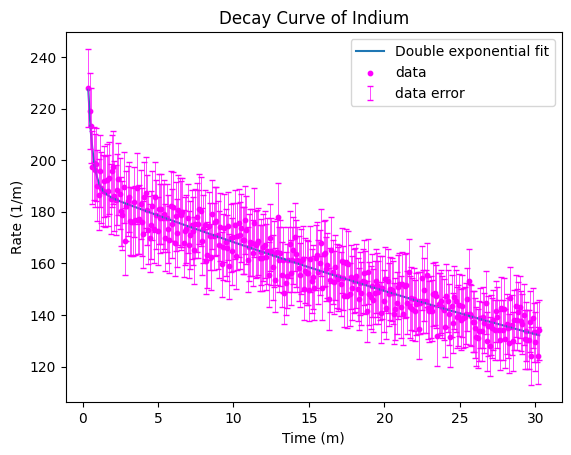

In [301]:
plt.plot(df['f0'].values,func(df['f0'].values,p1[0],p1[1],p1[2],p1[3],p1[4]) )
plt.scatter(df['f0'].values,df['f1'].values,color='magenta',s=10)
plt.xlabel('Time (m)')
plt.errorbar(df['f0'].values,df['f1'].values, yerr=np.sqrt(df['f1'].values),fmt='none', ecolor='magenta',elinewidth=0.5,capsize=2) 
plt.legend(['Double exponential fit','data','data error'])
plt.ylabel('Rate (1/m)')
plt.title('Decay Curve of Indium')
